# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities_df = pd.DataFrame(cities)
cities_df.head()

,0
0,castro
1,boyabat
2,bluff
3,kununurra
4,port hardy


In [6]:
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['MaxTemp'] = ""
cities_df['WindSpeed'] = ""

cities_df.head()

,0,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,castro,,,,,,,,
1,boyabat,,,,,,,,
2,bluff,,,,,,,,
3,kununurra,,,,,,,,
4,port hardy,,,,,,,,


In [7]:
cities_df.rename(columns = {cities_df.columns[0]: 'City'}, inplace = True)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,castro,,,,,,,,
1,boyabat,,,,,,,,
2,bluff,,,,,,,,
3,kununurra,,,,,,,,
4,port hardy,,,,,,,,


In [ ]:
# cities_subset = cities_df[:50]
#cities_subset =  ["Paris", "London", "Oslo", "Beijing"]

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
params ={
    "appid":api_key,
    "units":"metric",    
}

In [11]:
# loop through cities, make API request, and append desired results
# use iterrows to iterate through pandas dataframe

for index, row in cities_df.iterrows():
# for city in cities_subset:
# assemble url and make API request# get restaurant type from df
# get city from df
    city_name = row['City']
    
    params['q'] = city_name

    print(f"Retrieving Results for Index {index}: {city_name}.")
    response = requests.get(url,params=params).json()
    
    #results = response['results']
    
    try: 
            cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[index, 'Country'] = response['sys']['country']
            cities_df.loc[index, 'Date'] = response['dt']
            cities_df.loc[index, 'Humidity'] =response['main']['humidity']
            cities_df.loc[index, 'Lat'] = response['coord']['lat'] 
            cities_df.loc[index, 'Lng'] = response['coord']['lon']       
            cities_df.loc[index, 'MaxTemp'] = response['main']['temp_max']      
            cities_df.loc[index, 'WindSpeed'] = response['wind']['speed']       

    except (KeyError, IndexError):
            print("City Not Found")         
              
                
    print("-----------------------")
        

Retrieving Results for Index 0: castro.
-----------------------
Retrieving Results for Index 1: boyabat.
-----------------------
Retrieving Results for Index 2: bluff.
-----------------------
Retrieving Results for Index 3: kununurra.
-----------------------
Retrieving Results for Index 4: port hardy.
-----------------------
Retrieving Results for Index 5: antalaha.
-----------------------
Retrieving Results for Index 6: namatanai.
-----------------------
Retrieving Results for Index 7: punta arenas.
-----------------------
Retrieving Results for Index 8: narsaq.
-----------------------
Retrieving Results for Index 9: cape town.
-----------------------
Retrieving Results for Index 10: torbay.
-----------------------
Retrieving Results for Index 11: mataura.
-----------------------
Retrieving Results for Index 12: lorengau.
-----------------------
Retrieving Results for Index 13: kapaa.
-----------------------
Retrieving Results for Index 14: cabo san lucas.
-----------------------
Retr

-----------------------
Retrieving Results for Index 122: avera.
-----------------------
Retrieving Results for Index 123: ustyuzhna.
-----------------------
Retrieving Results for Index 124: new norfolk.
-----------------------
Retrieving Results for Index 125: sambava.
-----------------------
Retrieving Results for Index 126: cidreira.
-----------------------
Retrieving Results for Index 127: dzhusaly.
City Not Found
-----------------------
Retrieving Results for Index 128: sovetskiy.
-----------------------
Retrieving Results for Index 129: corpus christi.
-----------------------
Retrieving Results for Index 130: chenghai.
-----------------------
Retrieving Results for Index 131: westport.
-----------------------
Retrieving Results for Index 132: muros.
-----------------------
Retrieving Results for Index 133: bathsheba.
-----------------------
Retrieving Results for Index 134: qaanaaq.
-----------------------
Retrieving Results for Index 135: chokurdakh.
-----------------------
Ret

-----------------------
Retrieving Results for Index 239: praia da vitoria.
-----------------------
Retrieving Results for Index 240: pevek.
-----------------------
Retrieving Results for Index 241: laguna.
-----------------------
Retrieving Results for Index 242: west wendover.
-----------------------
Retrieving Results for Index 243: badou.
-----------------------
Retrieving Results for Index 244: sosnogorsk.
-----------------------
Retrieving Results for Index 245: valparaiso.
-----------------------
Retrieving Results for Index 246: sechura.
-----------------------
Retrieving Results for Index 247: cockburn harbour.
City Not Found
-----------------------
Retrieving Results for Index 248: ribeira grande.
-----------------------
Retrieving Results for Index 249: pierre.
-----------------------
Retrieving Results for Index 250: grahamstown.
-----------------------
Retrieving Results for Index 251: lake city.
-----------------------
Retrieving Results for Index 252: tucuman.
----------

-----------------------
Retrieving Results for Index 356: ishinomaki.
-----------------------
Retrieving Results for Index 357: alta gracia.
-----------------------
Retrieving Results for Index 358: kousseri.
City Not Found
-----------------------
Retrieving Results for Index 359: port hedland.
-----------------------
Retrieving Results for Index 360: labutta.
City Not Found
-----------------------
Retrieving Results for Index 361: huarmey.
-----------------------
Retrieving Results for Index 362: rio brilhante.
-----------------------
Retrieving Results for Index 363: norfolk.
-----------------------
Retrieving Results for Index 364: hasaki.
-----------------------
Retrieving Results for Index 365: baherden.
-----------------------
Retrieving Results for Index 366: wulanhaote.
City Not Found
-----------------------
Retrieving Results for Index 367: san vicente.
-----------------------
Retrieving Results for Index 368: sao desiderio.
-----------------------
Retrieving Results for Index

-----------------------
Retrieving Results for Index 475: sabana abajo.
City Not Found
-----------------------
Retrieving Results for Index 476: maniwaki.
-----------------------
Retrieving Results for Index 477: ndioum.
-----------------------
Retrieving Results for Index 478: becerril.
-----------------------
Retrieving Results for Index 479: newport.
-----------------------
Retrieving Results for Index 480: ulaangom.
-----------------------
Retrieving Results for Index 481: champasak.
-----------------------
Retrieving Results for Index 482: lata.
-----------------------
Retrieving Results for Index 483: vostok.
-----------------------
Retrieving Results for Index 484: samusu.
City Not Found
-----------------------
Retrieving Results for Index 485: sao felix do xingu.
-----------------------
Retrieving Results for Index 486: sherman.
-----------------------
Retrieving Results for Index 487: ivrea.
-----------------------
Retrieving Results for Index 488: faya.
----------------------

-----------------------
Retrieving Results for Index 594: oranjestad.
-----------------------
Retrieving Results for Index 595: oktyabrskiy.
-----------------------
Retrieving Results for Index 596: alofi.
-----------------------
Retrieving Results for Index 597: sibu.
-----------------------
Retrieving Results for Index 598: borazjan.
-----------------------
Retrieving Results for Index 599: biltine.
-----------------------
Retrieving Results for Index 600: qingdao.
-----------------------
Retrieving Results for Index 601: shakawe.
-----------------------
Retrieving Results for Index 602: ulladulla.
-----------------------
Retrieving Results for Index 603: charters towers.
-----------------------
Retrieving Results for Index 604: tabarqah.
City Not Found
-----------------------
Retrieving Results for Index 605: saint-georges.
-----------------------
Retrieving Results for Index 606: shumyachi.
-----------------------
Retrieving Results for Index 607: chapais.
-----------------------
R

In [22]:
cities_df.head(24)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,castro,0,CL,1539219374,81,-42.48,-73.76,7.17,3.91
1,boyabat,20,TR,1539219374,87,41.47,34.77,5.05,1.41
2,bluff,24,AU,1539219375,29,-23.58,149.07,32.17,6.31
3,kununurra,75,AU,1539218400,45,-15.77,128.74,29,7.7
4,port hardy,40,CA,1539216000,87,50.7,-127.42,11,2.6
5,antalaha,80,MG,1539219375,96,-14.9,50.28,22.52,5.71
6,namatanai,76,PG,1539219375,93,-3.66,152.44,29.65,5.16
7,punta arenas,75,CL,1539216000,65,-53.16,-70.91,7,11.8
8,narsaq,88,GL,1539215400,63,60.91,-46.05,-2,1
9,cape town,75,ZA,1539216000,82,-33.93,18.42,17,6.2


In [24]:
cities_df = cities_df[cities_df.Lat != "" ]

In [25]:
cities_df.head(24)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,castro,0,CL,1539219374,81,-42.48,-73.76,7.17,3.91
1,boyabat,20,TR,1539219374,87,41.47,34.77,5.05,1.41
2,bluff,24,AU,1539219375,29,-23.58,149.07,32.17,6.31
3,kununurra,75,AU,1539218400,45,-15.77,128.74,29,7.7
4,port hardy,40,CA,1539216000,87,50.7,-127.42,11,2.6
5,antalaha,80,MG,1539219375,96,-14.9,50.28,22.52,5.71
6,namatanai,76,PG,1539219375,93,-3.66,152.44,29.65,5.16
7,punta arenas,75,CL,1539216000,65,-53.16,-70.91,7,11.8
8,narsaq,88,GL,1539215400,63,60.91,-46.05,-2,1
9,cape town,75,ZA,1539216000,82,-33.93,18.42,17,6.2


In [38]:
cities_df.to_csv('Output/Cities.csv')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

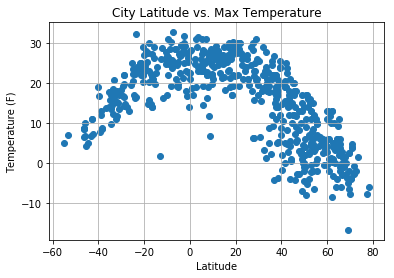

In [32]:
import time
#date = time.strftime("%m/%d/%Y")

plt.scatter(cities_df["Lat"], cities_df["MaxTemp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvTemperatureInWorldCities.png")

# Show plot
plt.show()


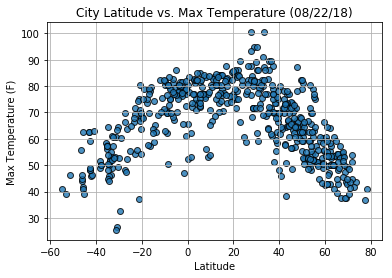

#### Latitude vs. Humidity Plot

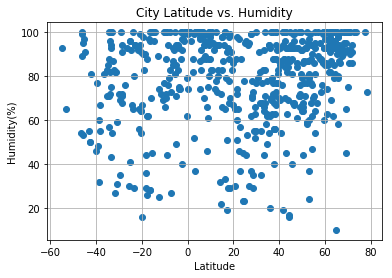

In [33]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvHumidityInWorldCities.png")

# Show plot
plt.show()

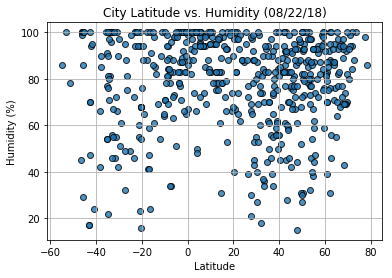

#### Latitude vs. Cloudiness Plot

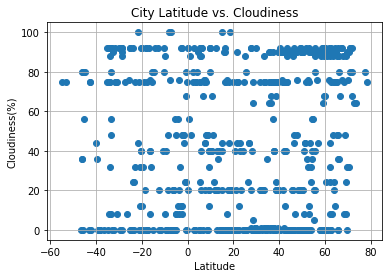

In [35]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloudinessInWorldCities.png")

# Show plot
plt.show()

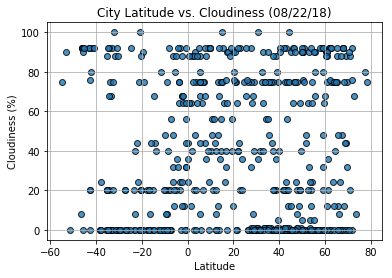

#### Latitude vs. Wind Speed Plot

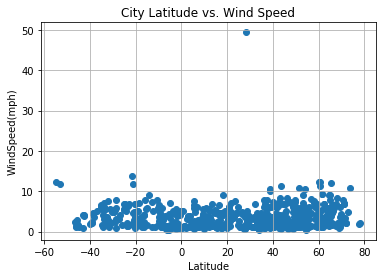

In [36]:
plt.scatter(cities_df["Lat"], cities_df["WindSpeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("WindSpeed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvWindSpeedInWorldCities.png")

# Show plot
plt.show()

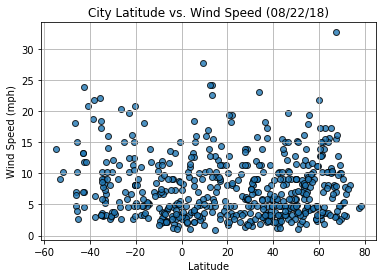